In [5]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

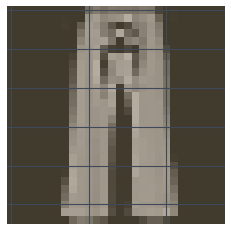

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [14]:
from torch import nn
import torch.nn.functional as F
from torch import optim

In [39]:
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x


In [40]:
# TODO: Create the network, define the criterion and optimizer
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

In [41]:
# TODO: Train the network here
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images ,labels in trainloader:
        # flatten
        images = images.view(images.shape[0], -1)
        #zero optimizer
        optimizer.zero_grad()
        #d¿forward pass
        output = model(images)
        #get loss
        loss = criterion(output, labels)
        #backward
        loss.backward()
        #step optimizer
        optimizer.step()
        running_loss+=loss.item()
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")

Training loss : 1.6067114508609528
Training loss : 0.8020326954914309
Training loss : 0.6545194359476378
Training loss : 0.5946929102449783
Training loss : 0.5547985013868255


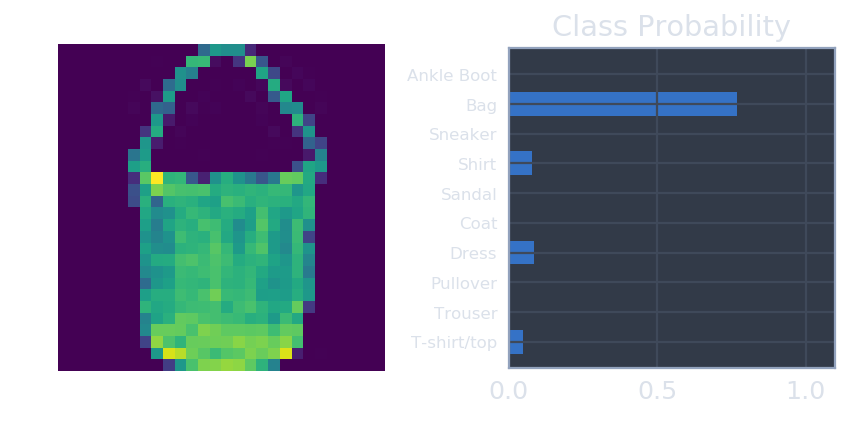

In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')